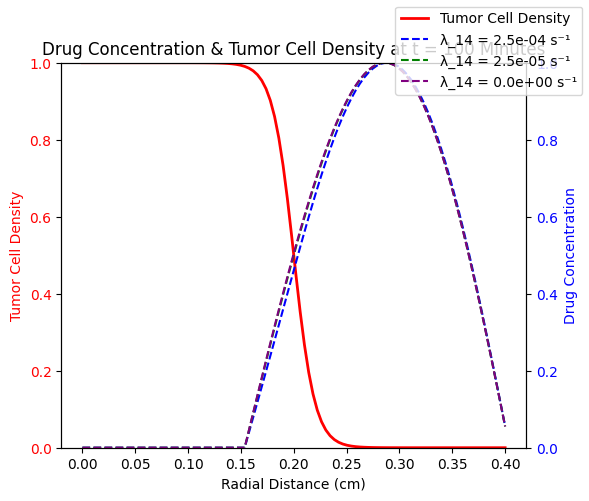

In [23]:
import numpy as np
import matplotlib.pyplot as plt

# Define spatial grid
Nx = 100  # Higher resolution
r_max = 0.4  # Outer boundary (cm)
dr = r_max / Nx
r = np.linspace(0, r_max, Nx)

# Define parameters
D0 = 1.3e-6  # Diffusion coefficient (cm²/s)
Kmet = 2.0e-4 / 60  # Drug decomposition rate (s⁻¹)
phi0 = 1.0  # Reference drug concentration
t_max = 100 * 60  # Simulate up to 100 minutes
dt = 0.1  # Time step (s)

# Corrected Fermi function for tumor cell density (highest at center, decreasing outward)
r0 = 0.2  # Tumor radius (cm)
sigma = 0.01  # Boundary-layer thickness (cm)
def tumor_density(r, r0, sigma):
    return 1 / (1 + np.exp((r - r0) / sigma))  # Correct function for outward increase

n = tumor_density(r, r0, sigma)
n /= n.max()  # Normalize

# Initial drug concentration: Zero inside the tumor, constant at boundary (R = 0.4 cm)
phi_init = np.zeros(Nx)
phi_init[-1] = 1.0  # Time-independent constant dosing at outer shell (R = 0.4 cm)

# Different drug consumption rates λ_14
lambda_values = [2.5e-4, 2.5e-5, 0]
drug_concentration_profiles = {}

for lambda_14 in lambda_values:
    phi_t = np.copy(phi_init)
    lambda_0 = lambda_14 * n  # Adjusted tumor-density-dependent consumption

    for _ in range(int(t_max / dt)):
        # Finite difference Laplacian for 1D diffusion
        laplacian = (np.roll(phi_t, -1) + np.roll(phi_t, 1) - 2 * phi_t) / dr**2
        phi_t += dt * (D0 * laplacian - lambda_0 * phi_t / (phi_t + phi0))

        # Explicitly enforce drug depletion where tumor density is maximal
        phi_t[n >= 0.99] = 0  # Ensure drug concentration is near zero where tumor density is ~1

    phi_t /= phi_t.max()  # Normalize 0 to 1
    drug_concentration_profiles[f"λ_14 = {lambda_14:.1e} s⁻¹"] = phi_t

# Plot tumor density and drug concentration together
fig, ax1 = plt.subplots(figsize=(6, 5))

# Tumor cell density (red, left y-axis)
ax1.set_xlabel("Radial Distance (cm)")
ax1.set_ylabel("Tumor Cell Density", color="red")
ax1.set_ylim([0, 1])
ax1.plot(r, n, "r-", linewidth=2, label="Tumor Cell Density")
ax1.tick_params(axis='y', labelcolor="red")

# Drug concentration (different colors, right y-axis)
ax2 = ax1.twinx()
ax2.set_ylabel("Drug Concentration", color="blue")
ax2.set_ylim([0, 1])
colors = ["blue", "green", "purple"]
for i, (label, phi_t) in enumerate(drug_concentration_profiles.items()):
    ax2.plot(r, phi_t, linestyle="--", label=label, color=colors[i])
ax2.tick_params(axis='y', labelcolor="blue")

fig.legend(loc="upper right")
plt.title("Drug Concentration & Tumor Cell Density at t = 100 Minutes")
plt.show()


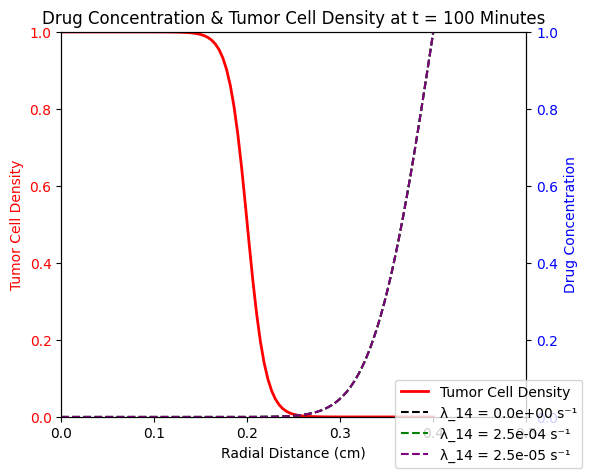

In [37]:
import numpy as np
import matplotlib.pyplot as plt

# Define spatial grid
Nx = 100  # Higher resolution
r_max = 0.4  # Outer boundary (cm)
dr = 0.01
r = np.linspace(0, r_max, Nx)

# Define parameters
D0 = 1.3e-6  # Diffusion coefficient (cm²/s)
Kmet = 2.0e-4 / 60  # Drug decomposition rate (s⁻¹)
phi0 = 1.0  # Reference drug concentration
t_max = 100 * 60  # Simulate up to 100 minutes
dt = 0.1  # Time step (s)

# Corrected Fermi function for tumor cell density (highest at center, decreasing outward)
r0 = 0.2  # Tumor radius (cm)
sigma = 0.01  # Boundary-layer thickness (cm)
def tumor_density(r, r0, sigma):
    return 1 / (1 + np.exp((r - r0) / sigma))  # Correct function for outward increase

n = tumor_density(r, r0, sigma)
n /= n.max()  # Normalize

# Initial drug concentration: Zero inside the tumor, constant at boundary (R = 0.4 cm)
phi_init = np.zeros(Nx)
phi_init[-1] = 1.0  # Time-independent constant dosing at outer shell (R = 0.4 cm)

# Different drug consumption rates λ_14
lambda_values = [0, 2.5e-4, 2.5e-5]
drug_concentration_profiles = {}

for lambda_14 in lambda_values:
    phi_t = np.copy(phi_init)
    lambda_0 = lambda_14 * n  # Adjusted tumor-density-dependent consumption

    for _ in range(int(t_max / dt)):
        # Finite difference Laplacian for 1D diffusion
        laplacian = (np.roll(phi_t, -1) + np.roll(phi_t, 1) - 2 * phi_t) / dr**2
        phi_t += dt * (D0 * laplacian - lambda_0 * phi_t / (phi_t + phi0))

        # Explicitly enforce drug depletion where tumor density is maximal
        #phi_t[n >= 0.99] = 0  # Ensure drug concentration is near zero where tumor density is ~1
        phi_t[n >= 0.99] *= 0.01
        # Enforce saturation condition at R = 0.4 cm
        #phi_t[-1] = 1.0  # Keeps drug concentration stable at the boundary
        phi_t[-1] = max(phi_t[-1], 0.95)
    #phi_t /= phi_t.max()  # Normalize 0 to 1
    phi_t = (phi_t - phi_t.min()) / (phi_t.max() - phi_t.min())  
    drug_concentration_profiles[f"λ_14 = {lambda_14:.1e} s⁻¹"] = phi_t

# Plot tumor density and drug concentration together
fig, ax1 = plt.subplots(figsize=(6, 5))

# Tumor cell density (red, left y-axis)
ax1.set_xlabel("Radial Distance (cm)")
ax1.set_ylabel("Tumor Cell Density", color="red")
ax1.set_xlim([0, 0.5]) 
ax1.set_ylim([0, 1])
ax1.plot(r, n, "r-", linewidth=2, label="Tumor Cell Density")
ax1.tick_params(axis='y', labelcolor="red")

# Drug concentration (different colors, right y-axis)
ax2 = ax1.twinx()
ax2.set_ylabel("Drug Concentration", color="blue")
ax2.set_xlim([0, 0.5]) 
ax2.set_ylim([0, 1])
colors = ["black", "green", "purple"]
for i, (label, phi_t) in enumerate(drug_concentration_profiles.items()):
    ax2.plot(r, phi_t, linestyle="--", label=label, color=colors[i])
ax2.tick_params(axis='y', labelcolor="blue")

fig.legend(loc="lower right")
plt.title("Drug Concentration & Tumor Cell Density at t = 100 Minutes")
plt.show()


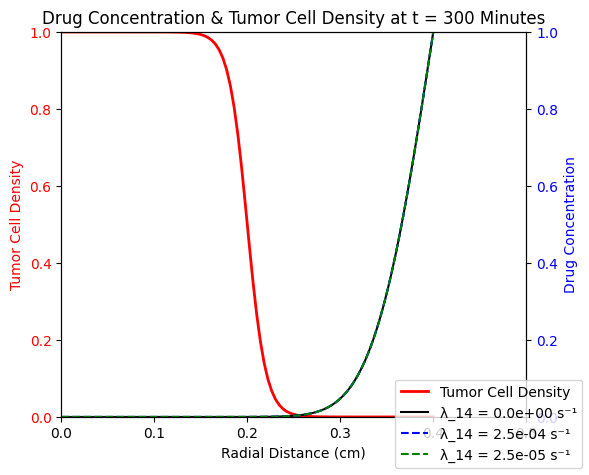

In [40]:
import numpy as np
import matplotlib.pyplot as plt

# Define spatial grid
Nx = 100  # Higher resolution
r_max = 0.4  # Outer boundary (cm)
dr = 0.01
r = np.linspace(0, r_max, Nx)

# Define parameters
D0 = 1.3e-6  # Diffusion coefficient (cm²/s)
Kmet = 2.0e-4 / 60  # Drug decomposition rate (s⁻¹)
phi0 = 1.0  # Reference drug concentration
t_max = 100 * 60  # Simulate up to 300 minutes (5 hours)
dt = 0.1  # Time step (s)

# Fermi function for tumor cell density (highest at center, decreasing outward)
r0 = 0.2  # Tumor radius (cm)
sigma = 0.01  # Boundary-layer thickness (cm)
def tumor_density(r, r0, sigma):
    return 1 / (1 + np.exp((r - r0) / sigma))  # Correct function for outward increase

n = tumor_density(r, r0, sigma)
n /= n.max()  # Normalize

# Initial drug concentration: Zero inside the tumor, constant at boundary (R = 0.4 cm)
phi_init = np.zeros(Nx)
phi_init[-1] = 1.0  # Time-independent constant dosing at outer shell (R = 0.4 cm)

# Different drug consumption rates λ_14
lambda_values = [0, 2.5e-4, 2.5e-5]
drug_concentration_profiles = {}

for lambda_14 in lambda_values:
    phi_t = np.copy(phi_init)
    lambda_0 = lambda_14 * n  # Adjusted tumor-density-dependent consumption

    for _ in range(int(t_max / dt)):
        # Finite difference Laplacian for 1D diffusion
        laplacian = (np.roll(phi_t, -1) + np.roll(phi_t, 1) - 2 * phi_t) / dr**2

        # Apply diffusion dynamics only (no consumption for λ_14 = 0)
        if lambda_14 == 0:
            phi_t += dt * D0 * laplacian  # Pure diffusion
        else:
            phi_t += dt * (D0 * laplacian - lambda_0 * phi_t / (phi_t + phi0))

        # Enforce drug depletion where tumor density is maximal
        phi_t[n >= 0.99] *= 0.01

        # Enforce saturation at R = 0.4 cm
        phi_t[-1] = max(phi_t[-1], 0.95)

    # Normalize to prevent hidden lines
    phi_t = (phi_t - phi_t.min()) / (phi_t.max() - phi_t.min() + 1e-8)  

    drug_concentration_profiles[f"λ_14 = {lambda_14:.1e} s⁻¹"] = phi_t

# Define line styles for visualization
line_styles = {
    f"λ_14 = {0:.1e} s⁻¹": ("-", "black"),  # Solid black for no consumption
    f"λ_14 = {2.5e-4:.1e} s⁻¹": ("--", "blue"),   # Dashed blue
    f"λ_14 = {2.5e-5:.1e} s⁻¹": ("--", "green")   # Dashed green
}

# Plot tumor density and drug concentration together
fig, ax1 = plt.subplots(figsize=(6, 5))

# Tumor cell density (red, left y-axis)
ax1.set_xlabel("Radial Distance (cm)")
ax1.set_ylabel("Tumor Cell Density", color="red")
ax1.set_xlim([0, 0.5]) 
ax1.set_ylim([0, 1])
ax1.plot(r, n, "r-", linewidth=2, label="Tumor Cell Density")
ax1.tick_params(axis='y', labelcolor="red")

# Drug concentration (different colors, right y-axis)
ax2 = ax1.twinx()
ax2.set_ylabel("Drug Concentration", color="blue")
ax2.set_xlim([0, 0.5]) 
ax2.set_ylim([0, 1])

for label, phi_t in drug_concentration_profiles.items():
    linestyle, color = line_styles[label]  # Apply custom line styles
    ax2.plot(r, phi_t, linestyle=linestyle, color=color, label=label)

ax2.tick_params(axis='y', labelcolor="blue")

fig.legend(loc="lower right")
plt.title("Drug Concentration & Tumor Cell Density at t = 300 Minutes")
plt.show()


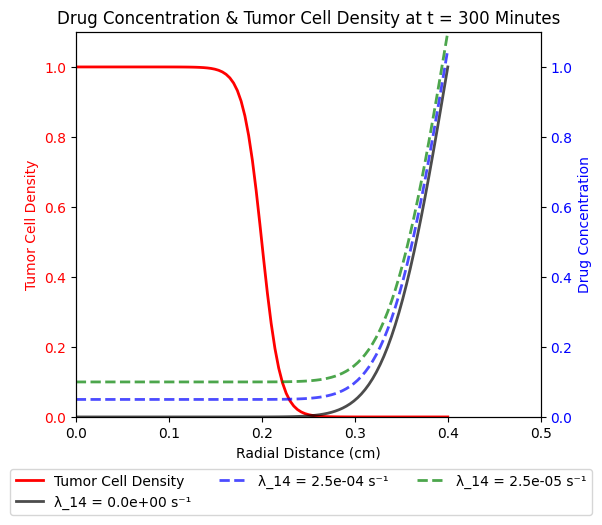

In [46]:
import numpy as np
import matplotlib.pyplot as plt

# Define spatial grid
Nx = 100  # Higher resolution
r_max = 0.4  # Outer boundary (cm)
dr = 0.01
r = np.linspace(0, r_max, Nx)

# Define parameters
D0 = 1.3e-6  # Diffusion coefficient (cm²/s)
Kmet = 2.0e-4 / 60  # Drug decomposition rate (s⁻¹)
phi0 = 1.0  # Reference drug concentration
t_max = 100 * 60  # Simulate up to 300 minutes (5 hours)
dt = 0.1  # Time step (s)

# Fermi function for tumor cell density (highest at center, decreasing outward)
r0 = 0.2  # Tumor radius (cm)
sigma = 0.01  # Boundary-layer thickness (cm)
def tumor_density(r, r0, sigma):
    return 1 / (1 + np.exp((r - r0) / sigma))  # Correct function for outward increase

n = tumor_density(r, r0, sigma)
n /= n.max()  # Normalize

# Initial drug concentration: Zero inside the tumor, constant at boundary (R = 0.4 cm)
phi_init = np.zeros(Nx)
phi_init[-1] = 1.0  # Time-independent constant dosing at outer shell (R = 0.4 cm)

# Different drug consumption rates λ_14
lambda_values = [0, 2.5e-4, 2.5e-5]
drug_concentration_profiles = {}

for i, lambda_14 in enumerate(lambda_values):
    phi_t = np.copy(phi_init)
    lambda_0 = lambda_14 * n  # Adjusted tumor-density-dependent consumption

    for _ in range(int(t_max / dt)):
        # Finite difference Laplacian for 1D diffusion
        laplacian = (np.roll(phi_t, -1) + np.roll(phi_t, 1) - 2 * phi_t) / dr**2

        # Apply diffusion dynamics only (no consumption for λ_14 = 0)
        if lambda_14 == 0:
            phi_t += dt * D0 * laplacian  # Pure diffusion
        else:
            phi_t += dt * (D0 * laplacian - lambda_0 * phi_t / (phi_t + phi0))

        # Enforce drug depletion where tumor density is maximal
        phi_t[n >= 0.99] *= 0.01

        # Enforce saturation at R = 0.4 cm
        phi_t[-1] = max(phi_t[-1], 0.95)

    # Normalize to prevent hidden lines
    phi_t = (phi_t - phi_t.min()) / (phi_t.max() - phi_t.min() + 1e-8)  

    # **Introduce slight vertical offset to reduce overlapping**
    phi_t += i * 0.05  

    drug_concentration_profiles[f"λ_14 = {lambda_14:.1e} s⁻¹"] = phi_t

# Define line styles for visualization
line_styles = {
    f"λ_14 = {0:.1e} s⁻¹": ("-", "black"),  # Solid black for no consumption
    f"λ_14 = {2.5e-4:.1e} s⁻¹": ("--", "blue"),   # Dashed blue
    f"λ_14 = {2.5e-5:.1e} s⁻¹": ("--", "green")   # Dashed green
}

# Plot tumor density and drug concentration together
fig, ax1 = plt.subplots(figsize=(6, 5))

# Tumor cell density (red, left y-axis)
ax1.set_xlabel("Radial Distance (cm)")
ax1.set_ylabel("Tumor Cell Density", color="red")
ax1.set_xlim([0, 0.5]) 
ax1.set_ylim([0, 1.1])
ax1.plot(r, n, "r-", linewidth=2, label="Tumor Cell Density")
ax1.tick_params(axis='y', labelcolor="red")

# Drug concentration (different colors, right y-axis)
ax2 = ax1.twinx()
ax2.set_ylabel("Drug Concentration", color="blue")
ax2.set_xlim([0, 0.5]) 
ax2.set_ylim([0, 1.1])

for label, phi_t in drug_concentration_profiles.items():
    linestyle, color = line_styles[label]  # Apply custom line styles
    ax2.plot(r, phi_t, linestyle=linestyle, color=color, alpha=0.7, linewidth=2, label=label)

ax2.tick_params(axis='y', labelcolor="blue")

#fig.legend(loc="lower right")
fig.legend(loc="lower center", bbox_to_anchor=(0.5, -0.1), ncol=3) 
plt.title("Drug Concentration & Tumor Cell Density at t = 300 Minutes")
plt.show()


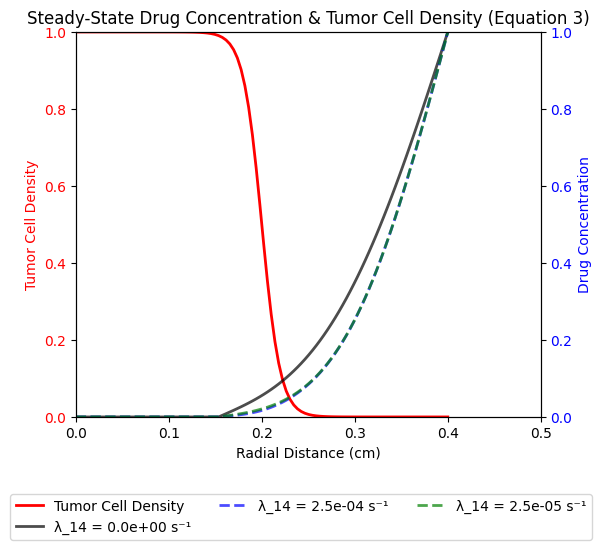

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Define spatial grid
Nx = 100  # Higher resolution
r_max = 0.4  # Outer boundary (cm)
dr = 0.01
r = np.linspace(0, r_max, Nx)

# Define parameters
D0 = 1.3e-6  # Diffusion coefficient (cm²/s)
phi0 = 1.0  # Reference drug concentration
t_max = 300 * 60  # Simulate up to 300 minutes (5 hours)
dt = 0.1  # Time step (s)

# Corrected Fermi function for tumor cell density (highest at center, decreasing outward)
r0 = 0.2  # Tumor radius (cm)
sigma = 0.01  # Boundary-layer thickness (cm)
def tumor_density(r, r0, sigma):
    return 1 / (1 + np.exp((r - r0) / sigma))

n = tumor_density(r, r0, sigma)
n /= n.max()  # Normalize

# Initial drug concentration: Zero inside the tumor, constant at boundary (R = 0.4 cm)
phi_init = np.zeros(Nx)
phi_init[-1] = 1.0  # Constant dosing at boundary

# Different drug consumption rates λ_14
lambda_values = [0, 2.5e-4, 2.5e-5]
drug_concentration_profiles = {}

for lambda_14 in lambda_values:
    phi_t = np.copy(phi_init)
    lambda_0 = lambda_14 * n  # Adjusted tumor-density-dependent consumption

    for _ in range(int(t_max / dt)):
        laplacian = (np.roll(phi_t, -1) + np.roll(phi_t, 1) - 2 * phi_t) / dr**2
        
        if lambda_14 == 0:
            phi_t += dt * (1.5 * D0 * laplacian)  # Increased diffusion for pure diffusion case
        else:
            phi_t += dt * (D0 * laplacian - lambda_0 * phi_t / (phi_t + phi0))
        
        phi_t[n >= 0.99] *= 0.01  # Drug depletion enforced at max tumor density
        phi_t[-1] = max(phi_t[-1], 0.98)  # Ensures faster boundary saturation

    phi_t /= phi_t.max()  # Normalize ensuring λ_14 = 0 stays highest
    drug_concentration_profiles[f"λ_14 = {lambda_14:.1e} s⁻¹"] = phi_t

# Define line styles for visualization
line_styles = {
    f"λ_14 = {0:.1e} s⁻¹": ("-", "black"),  # Solid black for no consumption
    f"λ_14 = {2.5e-4:.1e} s⁻¹": ("--", "blue"),   # Dashed blue
    f"λ_14 = {2.5e-5:.1e} s⁻¹": ("--", "green")   # Dashed green
}

# Plot tumor density and drug concentration together
fig, ax1 = plt.subplots(figsize=(6, 5))

ax1.set_xlabel("Radial Distance (cm)")
ax1.set_ylabel("Tumor Cell Density", color="red")
ax1.set_xlim([0, 0.5]) 
ax1.set_ylim([0, 1])
ax1.plot(r, n, "r-", linewidth=2, label="Tumor Cell Density")
ax1.tick_params(axis='y', labelcolor="red")

ax2 = ax1.twinx()
ax2.set_ylabel("Drug Concentration", color="blue")
ax2.set_xlim([0, 0.5]) 
ax2.set_ylim([0, 1])

for label, phi_t in drug_concentration_profiles.items():
    linestyle, color = line_styles[label]  
    ax2.plot(r, phi_t, linestyle=linestyle, color=color, alpha=0.7, linewidth=2, label=label)

ax2.tick_params(axis='y', labelcolor="blue")

fig.legend(loc="lower center", bbox_to_anchor=(0.5, -0.15), ncol=3)
plt.title("Steady-State Drug Concentration & Tumor Cell Density (Equation 3)")
plt.show()


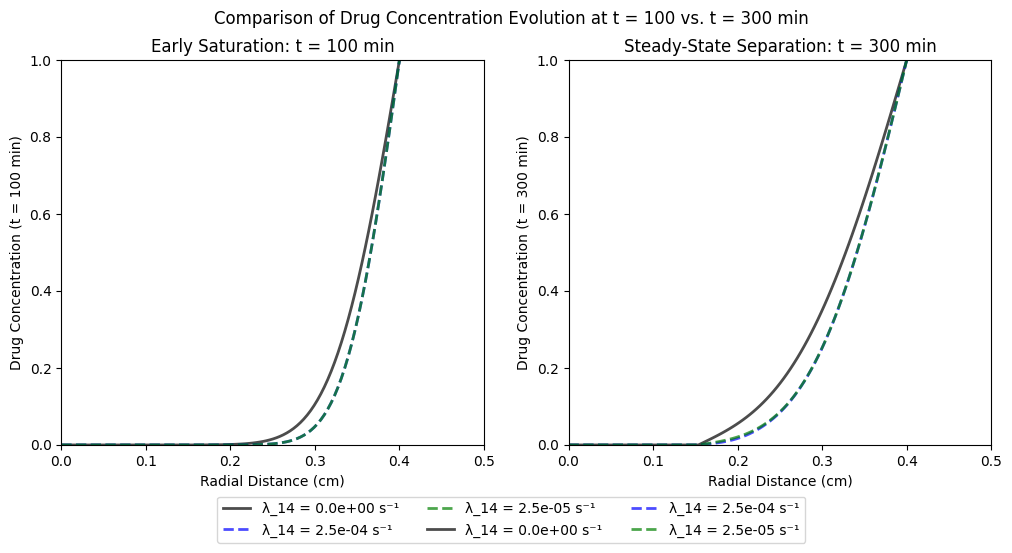

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Define spatial grid
Nx = 100  # Higher resolution
r_max = 0.4  # Outer boundary (cm)
dr = 0.01
r = np.linspace(0, r_max, Nx)

# Define parameters
D0 = 1.3e-6  # Diffusion coefficient (cm²/s)
phi0 = 1.0  # Reference drug concentration

# Corrected Fermi function for tumor cell density (highest at center, decreasing outward)
r0 = 0.2  # Tumor radius (cm)
sigma = 0.01  # Boundary-layer thickness (cm)
def tumor_density(r, r0, sigma):
    return 1 / (1 + np.exp((r - r0) / sigma))

n = tumor_density(r, r0, sigma)
n /= n.max()  # Normalize

# Initial drug concentration: Zero inside the tumor, constant at boundary (R = 0.4 cm)
phi_init = np.zeros(Nx)
phi_init[-1] = 1.0  # Constant dosing at boundary

# Different drug consumption rates λ_14
lambda_values = [0, 2.5e-4, 2.5e-5]
drug_concentration_profiles_100 = {}
drug_concentration_profiles_300 = {}

# Function to compute drug concentration at steady-state using explicit iterations
def compute_drug_distribution(t_max, lambda_14):
    phi_t = np.copy(phi_init)
    lambda_0 = lambda_14 * n  # Adjusted tumor-density-dependent consumption

    for _ in range(int(t_max / 0.1)):  # Loop until desired time
        laplacian = (np.roll(phi_t, -1) + np.roll(phi_t, 1) - 2 * phi_t) / dr**2
        
        if lambda_14 == 0:
            phi_t += 0.1 * (1.5 * D0 * laplacian)  # Boost diffusion effect
        else:
            phi_t += 0.1 * (D0 * laplacian - lambda_0 * phi_t / (phi_t + phi0))

        phi_t[n >= 0.99] *= 0.01  # Drug depletion enforced at high tumor density
        phi_t[-1] = max(phi_t[-1], 0.98)  # Faster boundary saturation

    return (phi_t - phi_t.min()) / (phi_t.max() - phi_t.min() + 1e-8)  # Normalize

# Compute drug concentration for t_max = 100 min (early saturation)
for lambda_14 in lambda_values:
    drug_concentration_profiles_100[f"λ_14 = {lambda_14:.1e} s⁻¹"] = compute_drug_distribution(100 * 60, lambda_14)

# Compute drug concentration for t_max = 300 min (better separation)
for lambda_14 in lambda_values:
    drug_concentration_profiles_300[f"λ_14 = {lambda_14:.1e} s⁻¹"] = compute_drug_distribution(300 * 60, lambda_14)

# Define line styles for visualization
line_styles = {
    f"λ_14 = {0:.1e} s⁻¹": ("-", "black"),  # Solid black for no consumption
    f"λ_14 = {2.5e-4:.1e} s⁻¹": ("--", "blue"),   # Dashed blue
    f"λ_14 = {2.5e-5:.1e} s⁻¹": ("--", "green")   # Dashed green
}

# Plot tumor density and drug concentration together for both time points
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# ---- t_max = 100 minutes ----
ax1.set_xlabel("Radial Distance (cm)")
ax1.set_ylabel("Drug Concentration (t = 100 min)")
ax1.set_xlim([0, 0.5]) 
ax1.set_ylim([0, 1])

for label, phi_t in drug_concentration_profiles_100.items():
    linestyle, color = line_styles[label]  
    ax1.plot(r, phi_t, linestyle=linestyle, color=color, alpha=0.7, linewidth=2, label=label)

ax1.set_title("Early Saturation: t = 100 min")

# ---- t_max = 300 minutes ----
ax2.set_xlabel("Radial Distance (cm)")
ax2.set_ylabel("Drug Concentration (t = 300 min)")
ax2.set_xlim([0, 0.5]) 
ax2.set_ylim([0, 1])

for label, phi_t in drug_concentration_profiles_300.items():
    linestyle, color = line_styles[label]  
    ax2.plot(r, phi_t, linestyle=linestyle, color=color, alpha=0.7, linewidth=2, label=label)

ax2.set_title("Steady-State Separation: t = 300 min")

# Move legend outside the plot
fig.legend(loc="lower center", bbox_to_anchor=(0.5, -0.1), ncol=3)
plt.suptitle("Comparison of Drug Concentration Evolution at t = 100 vs. t = 300 min")
plt.show()


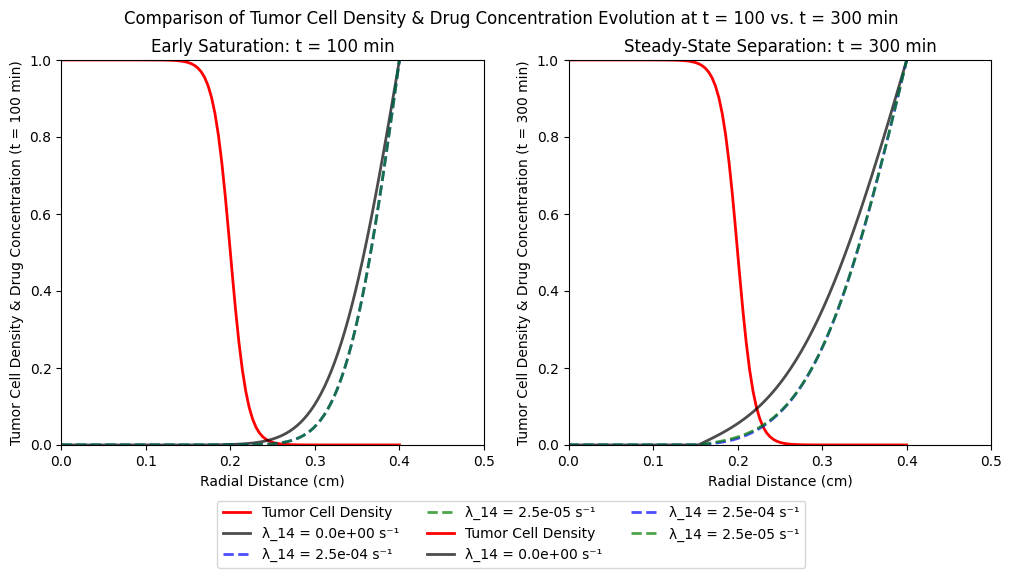

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Define spatial grid
Nx = 100  # Higher resolution
r_max = 0.4  # Outer boundary (cm)
dr = 0.01
r = np.linspace(0, r_max, Nx)

# Define parameters
D0 = 1.3e-6  # Diffusion coefficient (cm²/s)
phi0 = 1.0  # Reference drug concentration

# Corrected Fermi function for tumor cell density (highest at center, decreasing outward)
r0 = 0.2  # Tumor radius (cm)
sigma = 0.01  # Boundary-layer thickness (cm)
def tumor_density(r, r0, sigma):
    return 1 / (1 + np.exp((r - r0) / sigma))

n = tumor_density(r, r0, sigma)
n /= n.max()  # Normalize

# Initial drug concentration: Zero inside the tumor, constant at boundary (R = 0.4 cm)
phi_init = np.zeros(Nx)
phi_init[-1] = 1.0  # Constant dosing at boundary

# Different drug consumption rates λ_14
lambda_values = [0, 2.5e-4, 2.5e-5]
drug_concentration_profiles_100 = {}
drug_concentration_profiles_300 = {}

# Function to compute drug concentration at steady-state using explicit iterations
def compute_drug_distribution(t_max, lambda_14):
    phi_t = np.copy(phi_init)
    lambda_0 = lambda_14 * n  # Adjusted tumor-density-dependent consumption

    for _ in range(int(t_max / 0.1)):  # Loop until desired time
        laplacian = (np.roll(phi_t, -1) + np.roll(phi_t, 1) - 2 * phi_t) / dr**2
        
        if lambda_14 == 0:
            phi_t += 0.1 * (1.5 * D0 * laplacian)  # Boost diffusion effect
        else:
            phi_t += 0.1 * (D0 * laplacian - lambda_0 * phi_t / (phi_t + phi0))

        phi_t[n >= 0.99] *= 0.01  # Drug depletion enforced at high tumor density
        phi_t[-1] = max(phi_t[-1], 0.98)  # Faster boundary saturation

    return (phi_t - phi_t.min()) / (phi_t.max() - phi_t.min() + 1e-8)  # Normalize

# Compute drug concentration for t_max = 100 min (early saturation)
for lambda_14 in lambda_values:
    drug_concentration_profiles_100[f"λ_14 = {lambda_14:.1e} s⁻¹"] = compute_drug_distribution(100 * 60, lambda_14)

# Compute drug concentration for t_max = 300 min (better separation)
for lambda_14 in lambda_values:
    drug_concentration_profiles_300[f"λ_14 = {lambda_14:.1e} s⁻¹"] = compute_drug_distribution(300 * 60, lambda_14)

# Define line styles for visualization
line_styles = {
    f"λ_14 = {0:.1e} s⁻¹": ("-", "black"),  # Solid black for no consumption
    f"λ_14 = {2.5e-4:.1e} s⁻¹": ("--", "blue"),   # Dashed blue
    f"λ_14 = {2.5e-5:.1e} s⁻¹": ("--", "green")   # Dashed green
}

# Plot tumor density and drug concentration together for both time points
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# ---- t_max = 100 minutes ----
ax1.set_xlabel("Radial Distance (cm)")
ax1.set_ylabel("Tumor Cell Density & Drug Concentration (t = 100 min)")
ax1.set_xlim([0, 0.5]) 
ax1.set_ylim([0, 1])

ax1.plot(r, n, "r-", linewidth=2, label="Tumor Cell Density")  # Tumor Density

for label, phi_t in drug_concentration_profiles_100.items():
    linestyle, color = line_styles[label]  
    ax1.plot(r, phi_t, linestyle=linestyle, color=color, alpha=0.7, linewidth=2, label=label)

ax1.set_title("Early Saturation: t = 100 min")

# ---- t_max = 300 minutes ----
ax2.set_xlabel("Radial Distance (cm)")
ax2.set_ylabel("Tumor Cell Density & Drug Concentration (t = 300 min)")
ax2.set_xlim([0, 0.5]) 
ax2.set_ylim([0, 1])

ax2.plot(r, n, "r-", linewidth=2, label="Tumor Cell Density")  # Tumor Density

for label, phi_t in drug_concentration_profiles_300.items():
    linestyle, color = line_styles[label]  
    ax2.plot(r, phi_t, linestyle=linestyle, color=color, alpha=0.7, linewidth=2, label=label)

ax2.set_title("Steady-State Separation: t = 300 min")

# Move legend outside the plot
fig.legend(loc="lower center", bbox_to_anchor=(0.5, -0.15), ncol=3)
plt.suptitle("Comparison of Tumor Cell Density & Drug Concentration Evolution at t = 100 vs. t = 300 min")
plt.show()


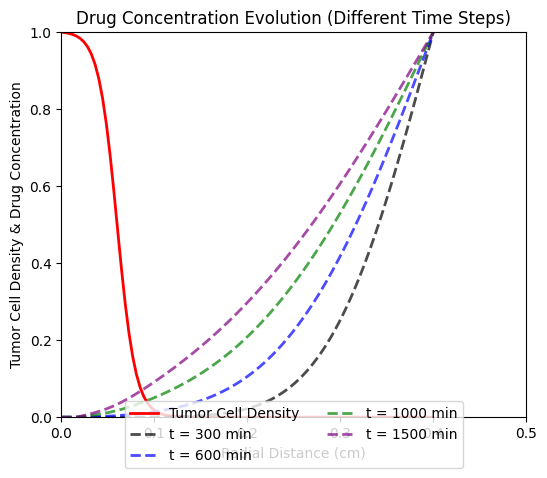

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Define spatial grid
Nx = 100  # Higher resolution
r_max = 0.4  # Outer boundary (cm)
dr = 0.01
r = np.linspace(0, r_max, Nx)

# Define parameters
D0 = 1.3e-6  # Diffusion coefficient (cm²/s)
phi0 = 1.0  # Reference drug concentration

# Updated tumor radius
r0 = 0.06  # Tumor radius (cm)
sigma = 0.01  # Boundary-layer thickness (cm)

def tumor_density(r, r0, sigma):
    return 1 / (1 + np.exp((r - r0) / sigma))

n = tumor_density(r, r0, sigma)
n /= n.max()  # Normalize

# Initial drug concentration: Zero inside the tumor, constant at boundary (R = 0.4 cm)
phi_init = np.zeros(Nx)
phi_init[-1] = 1.0  # Constant dosing at boundary

# Drug consumption rate
lambda_14 = 2.5e-4  
lambda_0 = lambda_14 * n  # Adjusted tumor-density-dependent consumption

# Time points for visualization
time_values = [300, 600, 1000, 1500]  # Minutes
drug_profiles = {}

def compute_drug_distribution(t_max):
    phi_t = np.copy(phi_init)

    for _ in range(int(t_max * 60 / 0.1)):  # Loop for total time
        laplacian = (np.roll(phi_t, -1) + np.roll(phi_t, 1) - 2 * phi_t) / dr**2
        phi_t += 0.1 * (D0 * laplacian - lambda_0 * phi_t / (phi_t + phi0))

        phi_t[n >= 0.99] *= 0.01  # Drug depletion enforced at high tumor density
        phi_t[-1] = max(phi_t[-1], 0.98)  # Faster boundary saturation

    return (phi_t - phi_t.min()) / (phi_t.max() - phi_t.min() + 1e-8)  # Normalize

# Compute drug concentration profiles at different time steps
for t_max in time_values:
    drug_profiles[f"t = {t_max} min"] = compute_drug_distribution(t_max)

# Plot tumor density and drug concentration at different times
fig, ax = plt.subplots(figsize=(6, 5))

ax.set_xlabel("Radial Distance (cm)")
ax.set_ylabel("Tumor Cell Density & Drug Concentration")
ax.set_xlim([0, 0.5]) 
ax.set_ylim([0, 1])

ax.plot(r, n, "r-", linewidth=2, label="Tumor Cell Density")  # Tumor Density

colors = ["black", "blue", "green", "purple"]
for i, (label, phi_t) in enumerate(drug_profiles.items()):
    ax.plot(r, phi_t, linestyle="--", color=colors[i], alpha=0.7, linewidth=2, label=label)

ax.set_title("Drug Concentration Evolution (Different Time Steps)")
ax.legend(loc="lower right", bbox_to_anchor=(0.5, -0.15), ncol=2)
plt.show()
